## BikeSharing Demand Prediction via Linear Regression

# Problem Statement 
Consider a organization which runs a bikesharing company and willing to utilize the machine learning technique to understand the factors which are affecting the demand of bikesharing. Our objective is to find the following.

- Find the variables those are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1324]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1326]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1328]:
data = pd.read_csv('day.csv')

#### Reading Understanding and Data cleaning

In [1330]:
# Check the head of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1332]:
# Renaming the feature variable names for better readbility
data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [1334]:
data.shape

(730, 16)

In [1336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1338]:
# Drop the colums which are not seems to be needed
# Instant - Remove the Initial Index column
# dteday - Date is not needed since Month and Year are present
# casual, registered - As complete count is present in cnt 
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [1340]:
data.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [1344]:
# Mapping numeric values to categorical values
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
data.season = data.season.map(season_mapping)

In [1346]:
# Mapping numeric values to categorical values
month_mapping = {
    1: 'jan',  # Janurary
    2: 'feb',  # Feburary
    3: 'mar',  # March
    4: 'apr',  # April
    5: 'may',  # May
    6: 'jun',  # June
    7: 'jul',  # July
    8: 'aug',  # August
    9: 'spe',  # September
    10: 'oct', # October
    11: 'nov', # November
    12: 'dec'  # December
}
data.month = data.month.map(month_mapping)

In [1348]:
# Mapping numeric values to categorical values
weekday_mapping = {
    0: 'sun',  # Sunday
    1: 'mon',  # Monday
    2: 'tue',  # Tuesday
    3: 'web',  # Wednesady
    4: 'thu',  # Thursday
    5: 'fri',  # Friday
    6: 'sat'   # Saturday
}
data.weekday = data.weekday.map(weekday_mapping)

In [1350]:
# Mapping numeric values to categorical values
weather_mapping = {
    1: 'clear',             #'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'mist',              #'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'light_snowrain',    #'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'heavy_snowrain'    #'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
data.weathersit = data.weathersit.map(weather_mapping)

In [1352]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,web,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [1354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualize the Categorial Variables

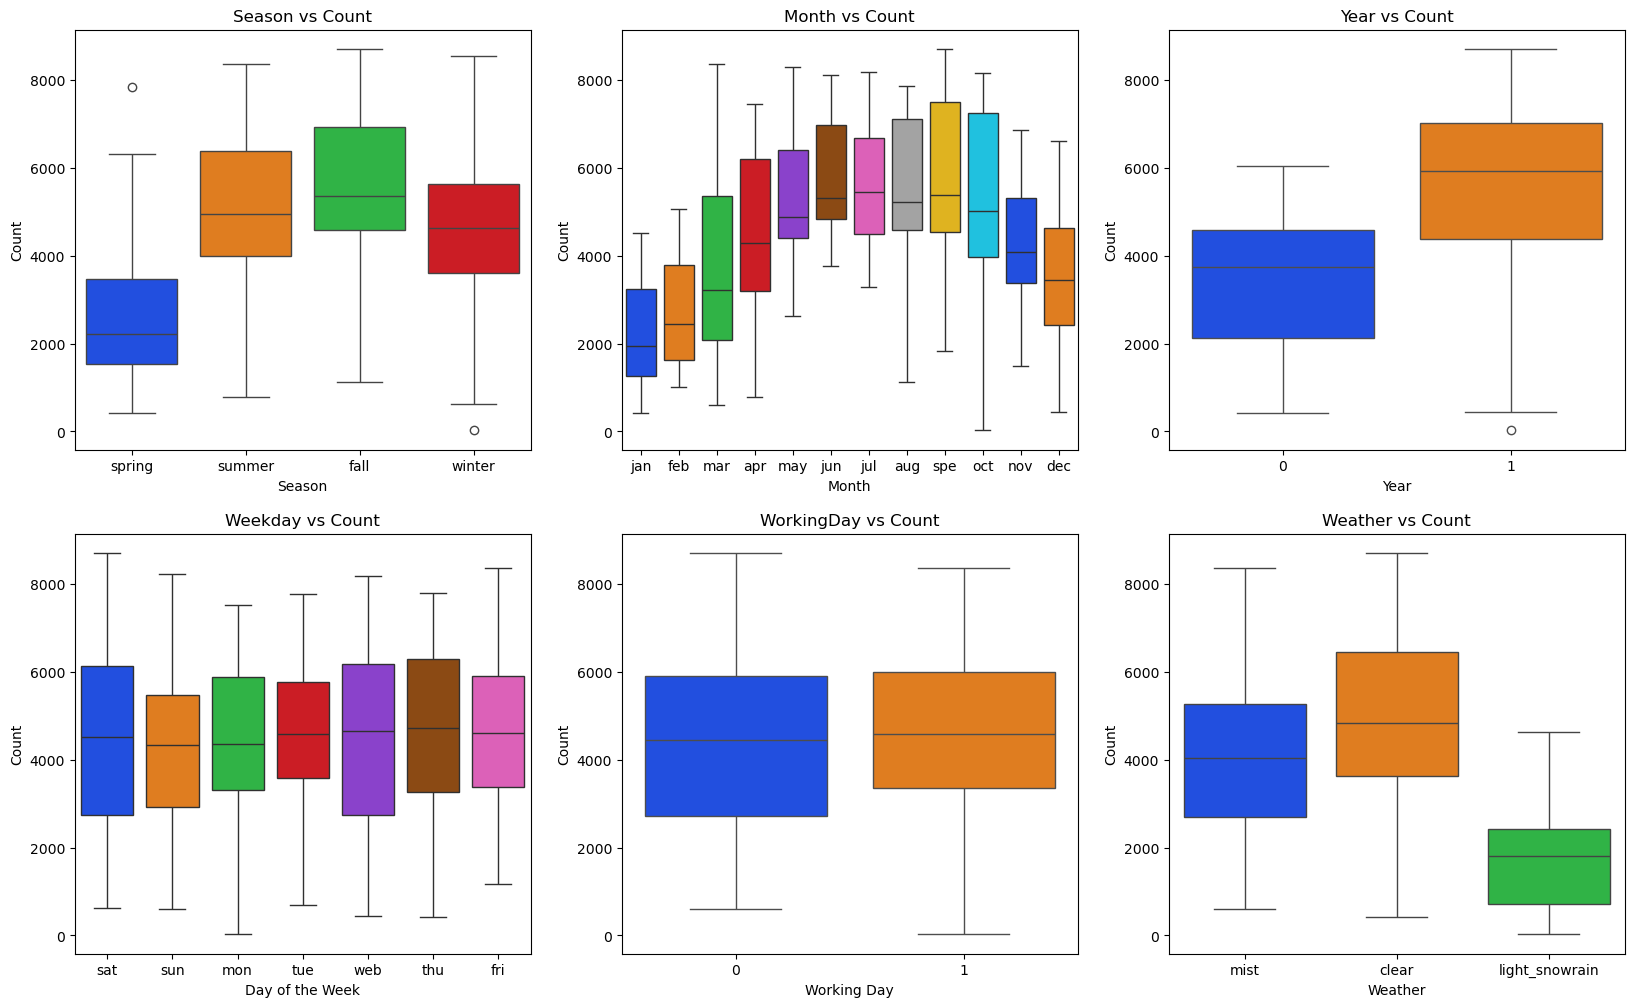

In [1357]:
# Visualizing the Categorical Variables - #Season, Month, Weakday, Weather
plt.figure(figsize=(20,12)) 
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=data, palette='bright')
plt.title('Season vs Count')
plt.ylabel('Count')
plt.xlabel('Season')

plt.subplot(2,3,2)
sns.boxplot(x='month', y='cnt', data=data, palette='bright')
plt.title('Month vs Count')
plt.ylabel('Count')
plt.xlabel('Month')

plt.subplot(2,3,3)
sns.boxplot(x='year', y='cnt', data=data, palette='bright')
plt.title('Year vs Count')
plt.ylabel('Count')
plt.xlabel('Year')

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=data, palette='bright')
plt.title('Weekday vs Count')
plt.ylabel('Count')
plt.xlabel('Day of the Week')

plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data=data, palette='bright')
plt.title('WorkingDay vs Count')
plt.ylabel('Count')
plt.xlabel('Working Day')

plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data=data, palette='bright')
plt.title('Weather vs Count')
plt.ylabel('Count')
plt.xlabel('Weather')

plt.show()

In [1361]:
# Function to plot bargrpahs 
def cat_barplot(xcolumn, xlabel, ycolumn, ylabel, df):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=xcolumn, y=ycolumn, data=df, palette='bright')
    plt.subplot(1,2,2)
    sns.barplot(x=xcolumn, y=ycolumn, data=df, hue='year',palette='bright')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['2018', '2019'], title='Year')
    plt.show()

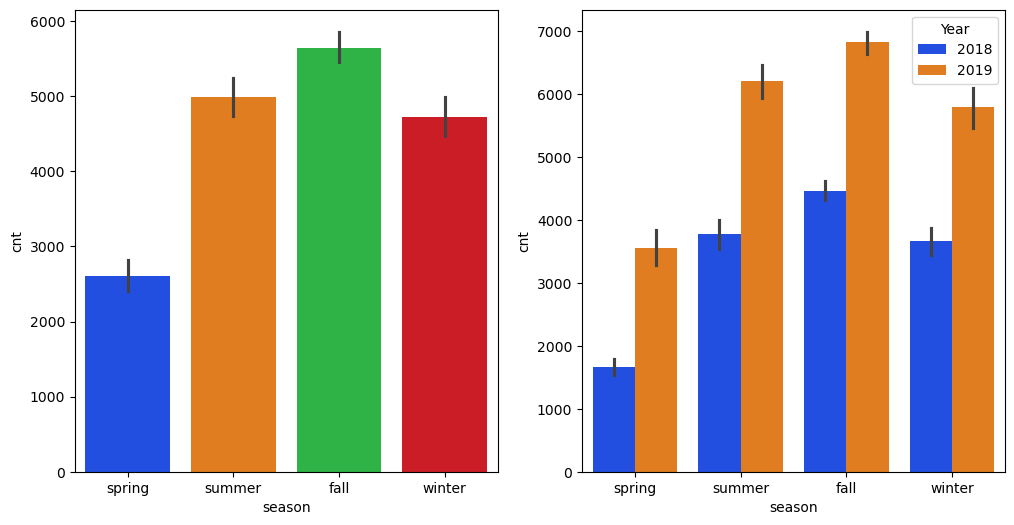

In [1363]:
# Visualize the complete Seasons data along with 2018-2019 comparison as well
cat_barplot('season','Season', 'cnt', 'Count', data)

##### Data reflects that most of the bookings were done during the Fall season and from 2018 to 2019 there has been increase in the data on yearly basis

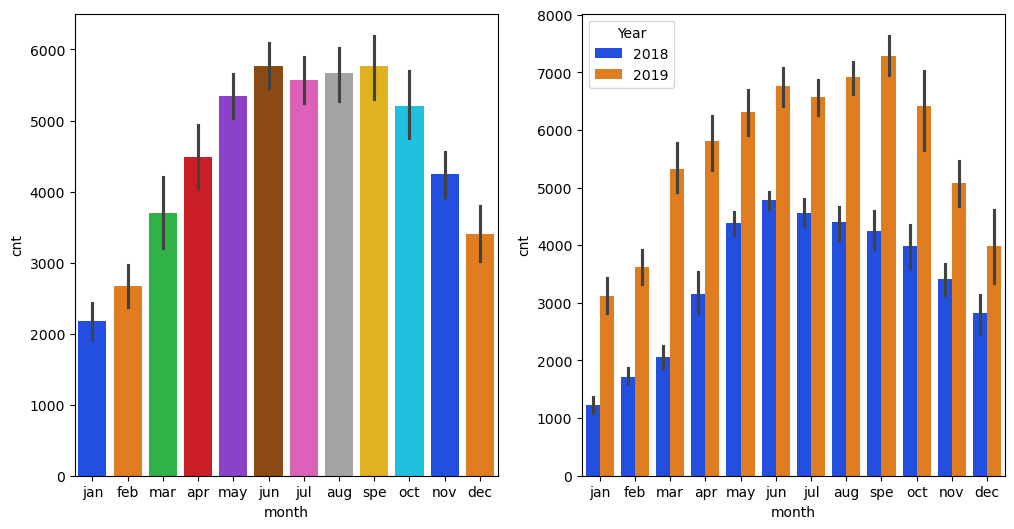

In [1368]:
# Visualize the complete Months data along with 2018-2019 comparison as well
cat_barplot('month', 'Month', 'cnt', 'Count', data)

##### Data reflects that most of the bookings were done during the May, June, July, August, September month and from 2018 to 2019 there has been increase in the data on yearly basis

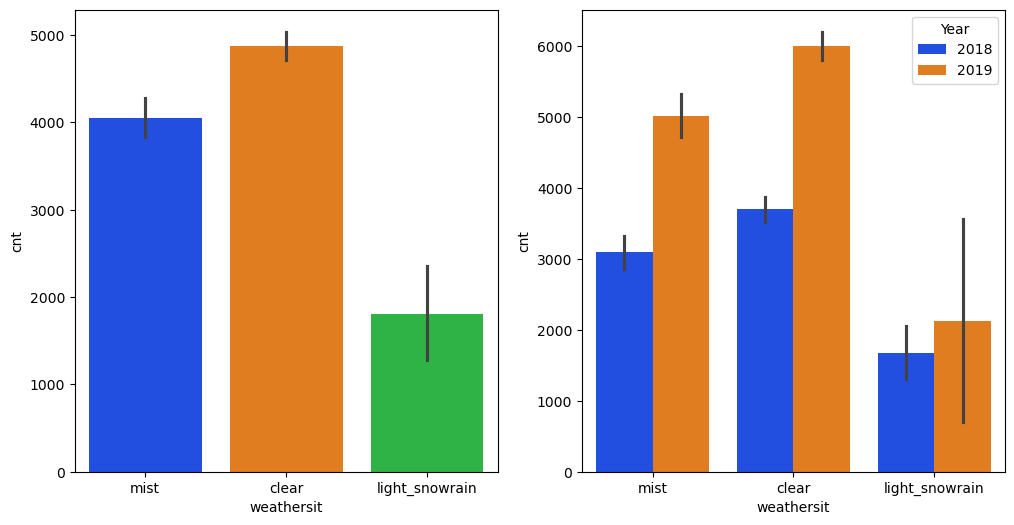

In [1372]:
# Visualize the complete Weather data along with 2018-2019 comparison as well
cat_barplot('weathersit', 'Weather', 'cnt', 'Count', data)

##### Data reflects that most of the bookings were done during the weather was 'Clear' and from 2018 to 2019 there has been increase in the data

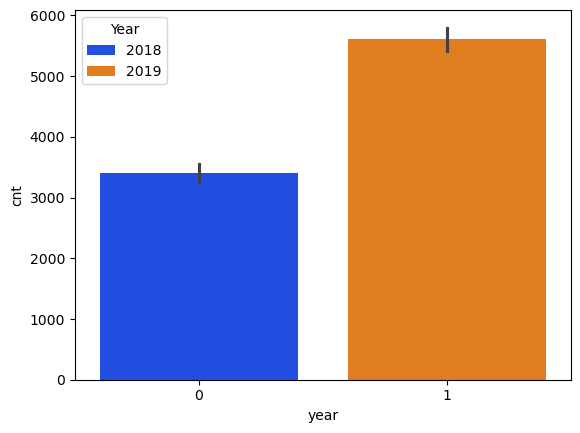

In [1379]:
# Create Graphs for year wise bookings analysis
sns.barplot(x='year', y='cnt', data=data, hue='year',palette='bright')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['2018', '2019'], title='Year')
plt.show()

##### Business is growing year on year basis as bookings has increased from 2018 to 2019

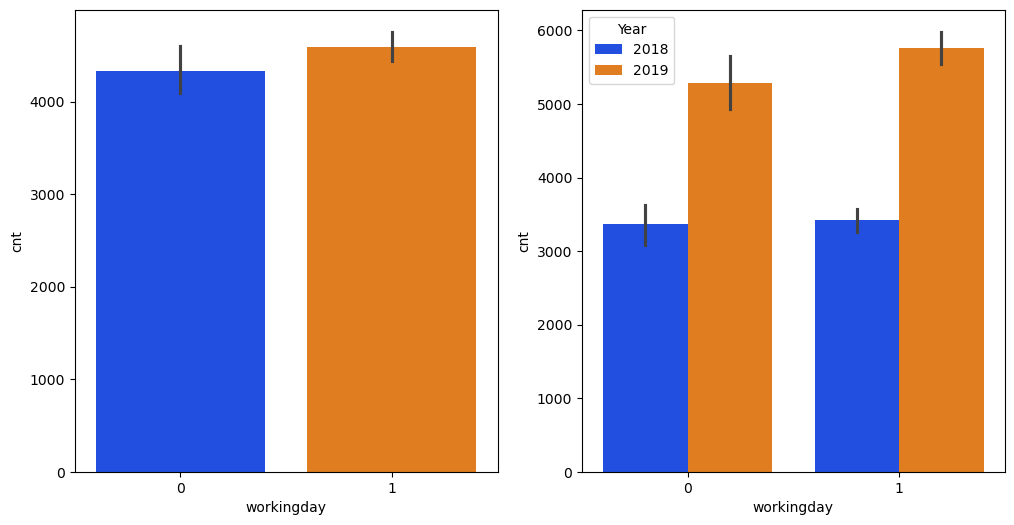

In [1382]:
# Visualize the bookings on working day vs non-working day
cat_barplot('workingday', 'Working Day', 'cnt', 'Count', data)

##### There seems to be no significent change visible on the basis of workingday

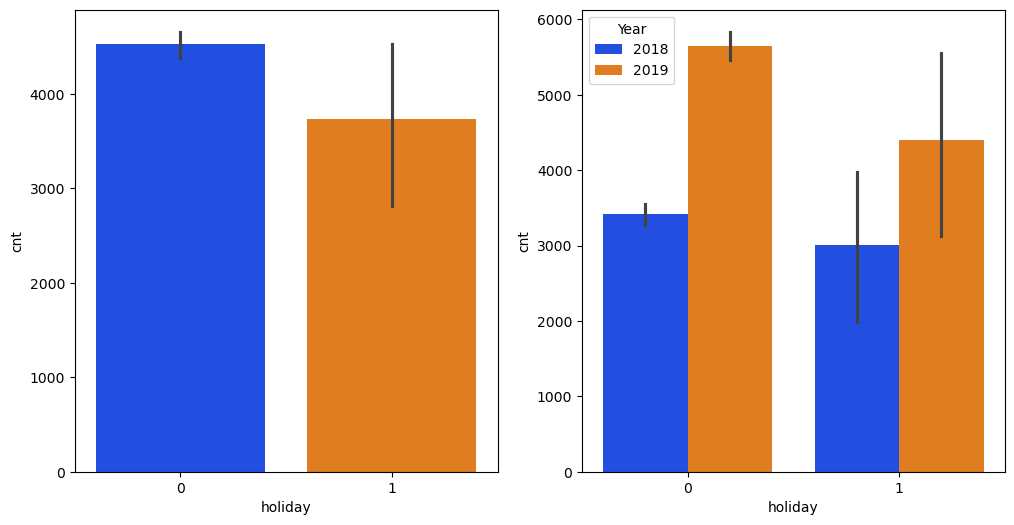

In [1385]:
# Visualize the bookings on Holiday on non-Holiday
cat_barplot('holiday', 'Holiday', 'cnt', 'Count', data)

##### More bookings are happneing during holidays

## Visualize the Numerical Variables

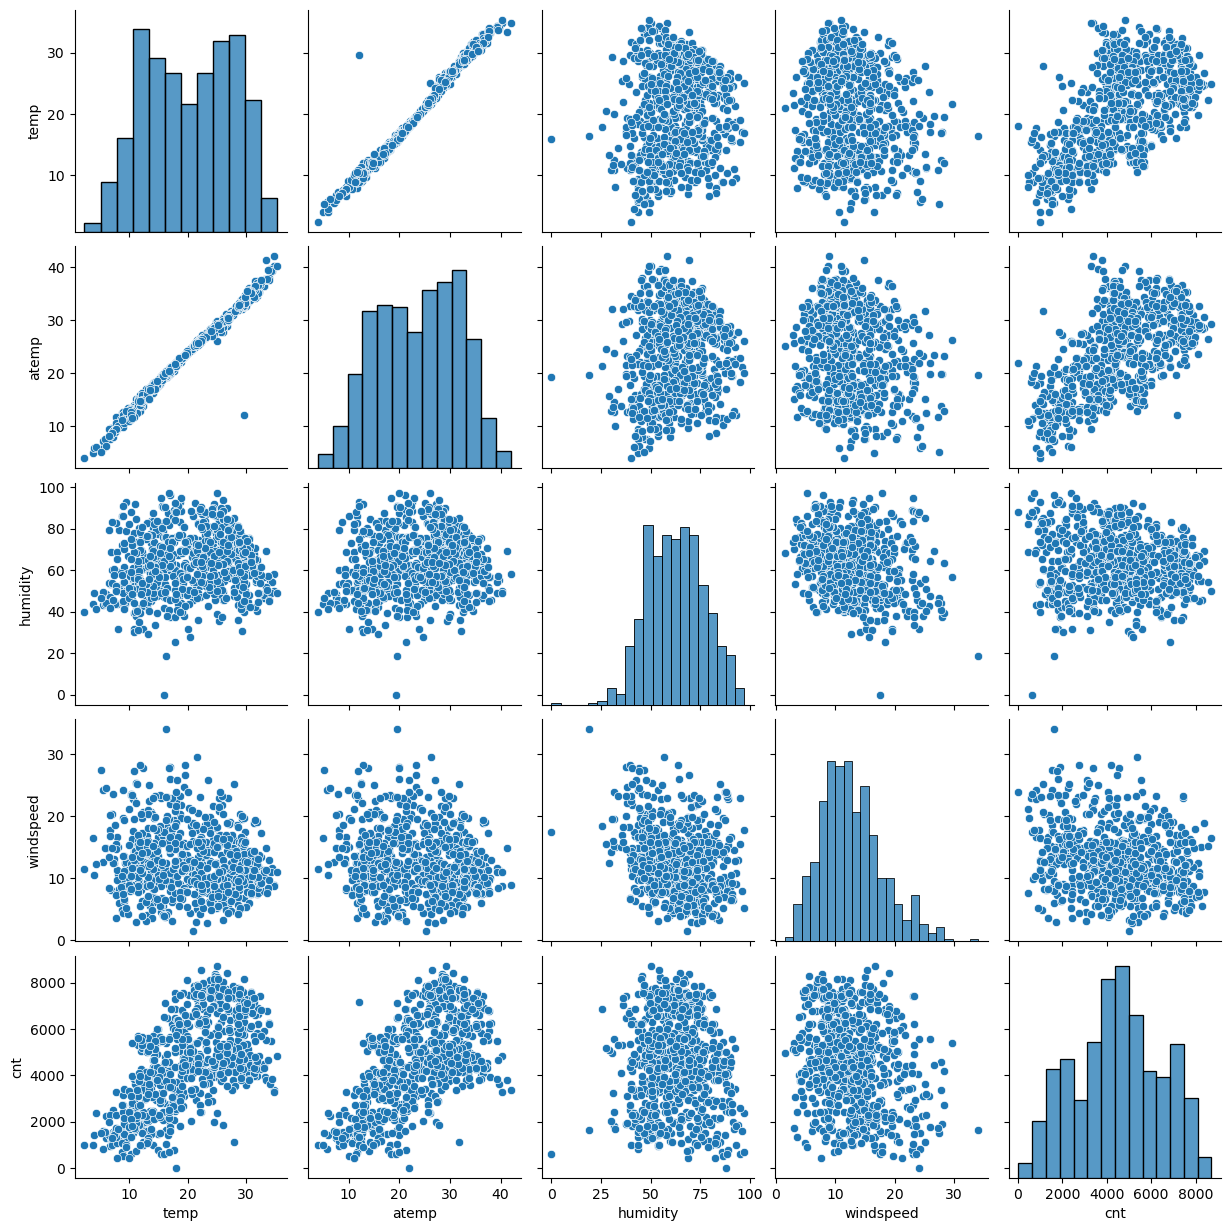

In [1393]:
# Analyze the Numerical Columns
sns.pairplot(data=data, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

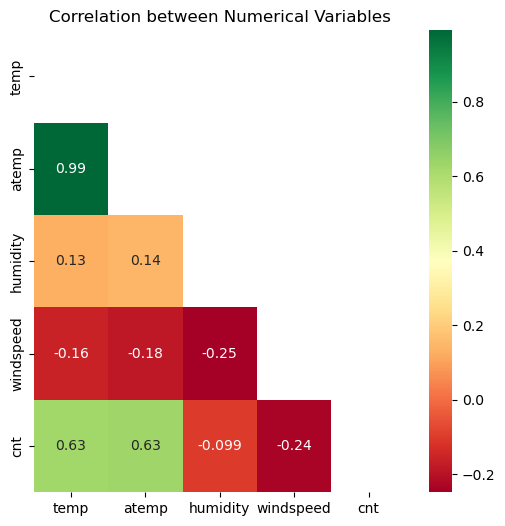

In [1395]:
# Driving the corelation between variables
plt.figure(figsize = (6,6))
matrix = np.triu(data[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### Maximum collinearity exists between temp and atemp features
#### Booking count has maximum corelration with temp feature

In [1402]:
# print all columns
data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

## Data Preparation

In [1404]:
# This function which generate dummy columns as well as remove the kth feature to handle multicollinearity
def prepare_dummycolumns(column, df):
     # Generate dummy variables
    dummy_columns = pd.get_dummies(df[column], drop_first = True).astype(int)
    # Concatenate dummy columns to the original DataFrame
    df = pd.concat([df, dummy_columns], axis = 1)
    # Drop the original column
    df.drop([column], axis = 1, inplace = True)
    # Return the modified DataFrame
    return df

In [1410]:
# Data columns for - Seasons
data = prepare_dummycolumns('season', data)
# Data columns for - Months
data = prepare_dummycolumns('month', data)
# Data columns for - Weather
data = prepare_dummycolumns('weathersit', data)
# Data columns for - Weekday
data = prepare_dummycolumns('weekday', data)

In [1412]:
data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,spe,light_snowrain,mist,mon,sat,sun,thu,tue,web
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting the data into Training Set and Test Set

In [1415]:
# Data Splitting using sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1417]:
# ReScaling the Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,spe,light_snowrain,mist,mon,sat,sun,thu,tue,web
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0


In [1419]:
data_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,spe,light_snowrain,mist,mon,sat,sun,thu,tue,web
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


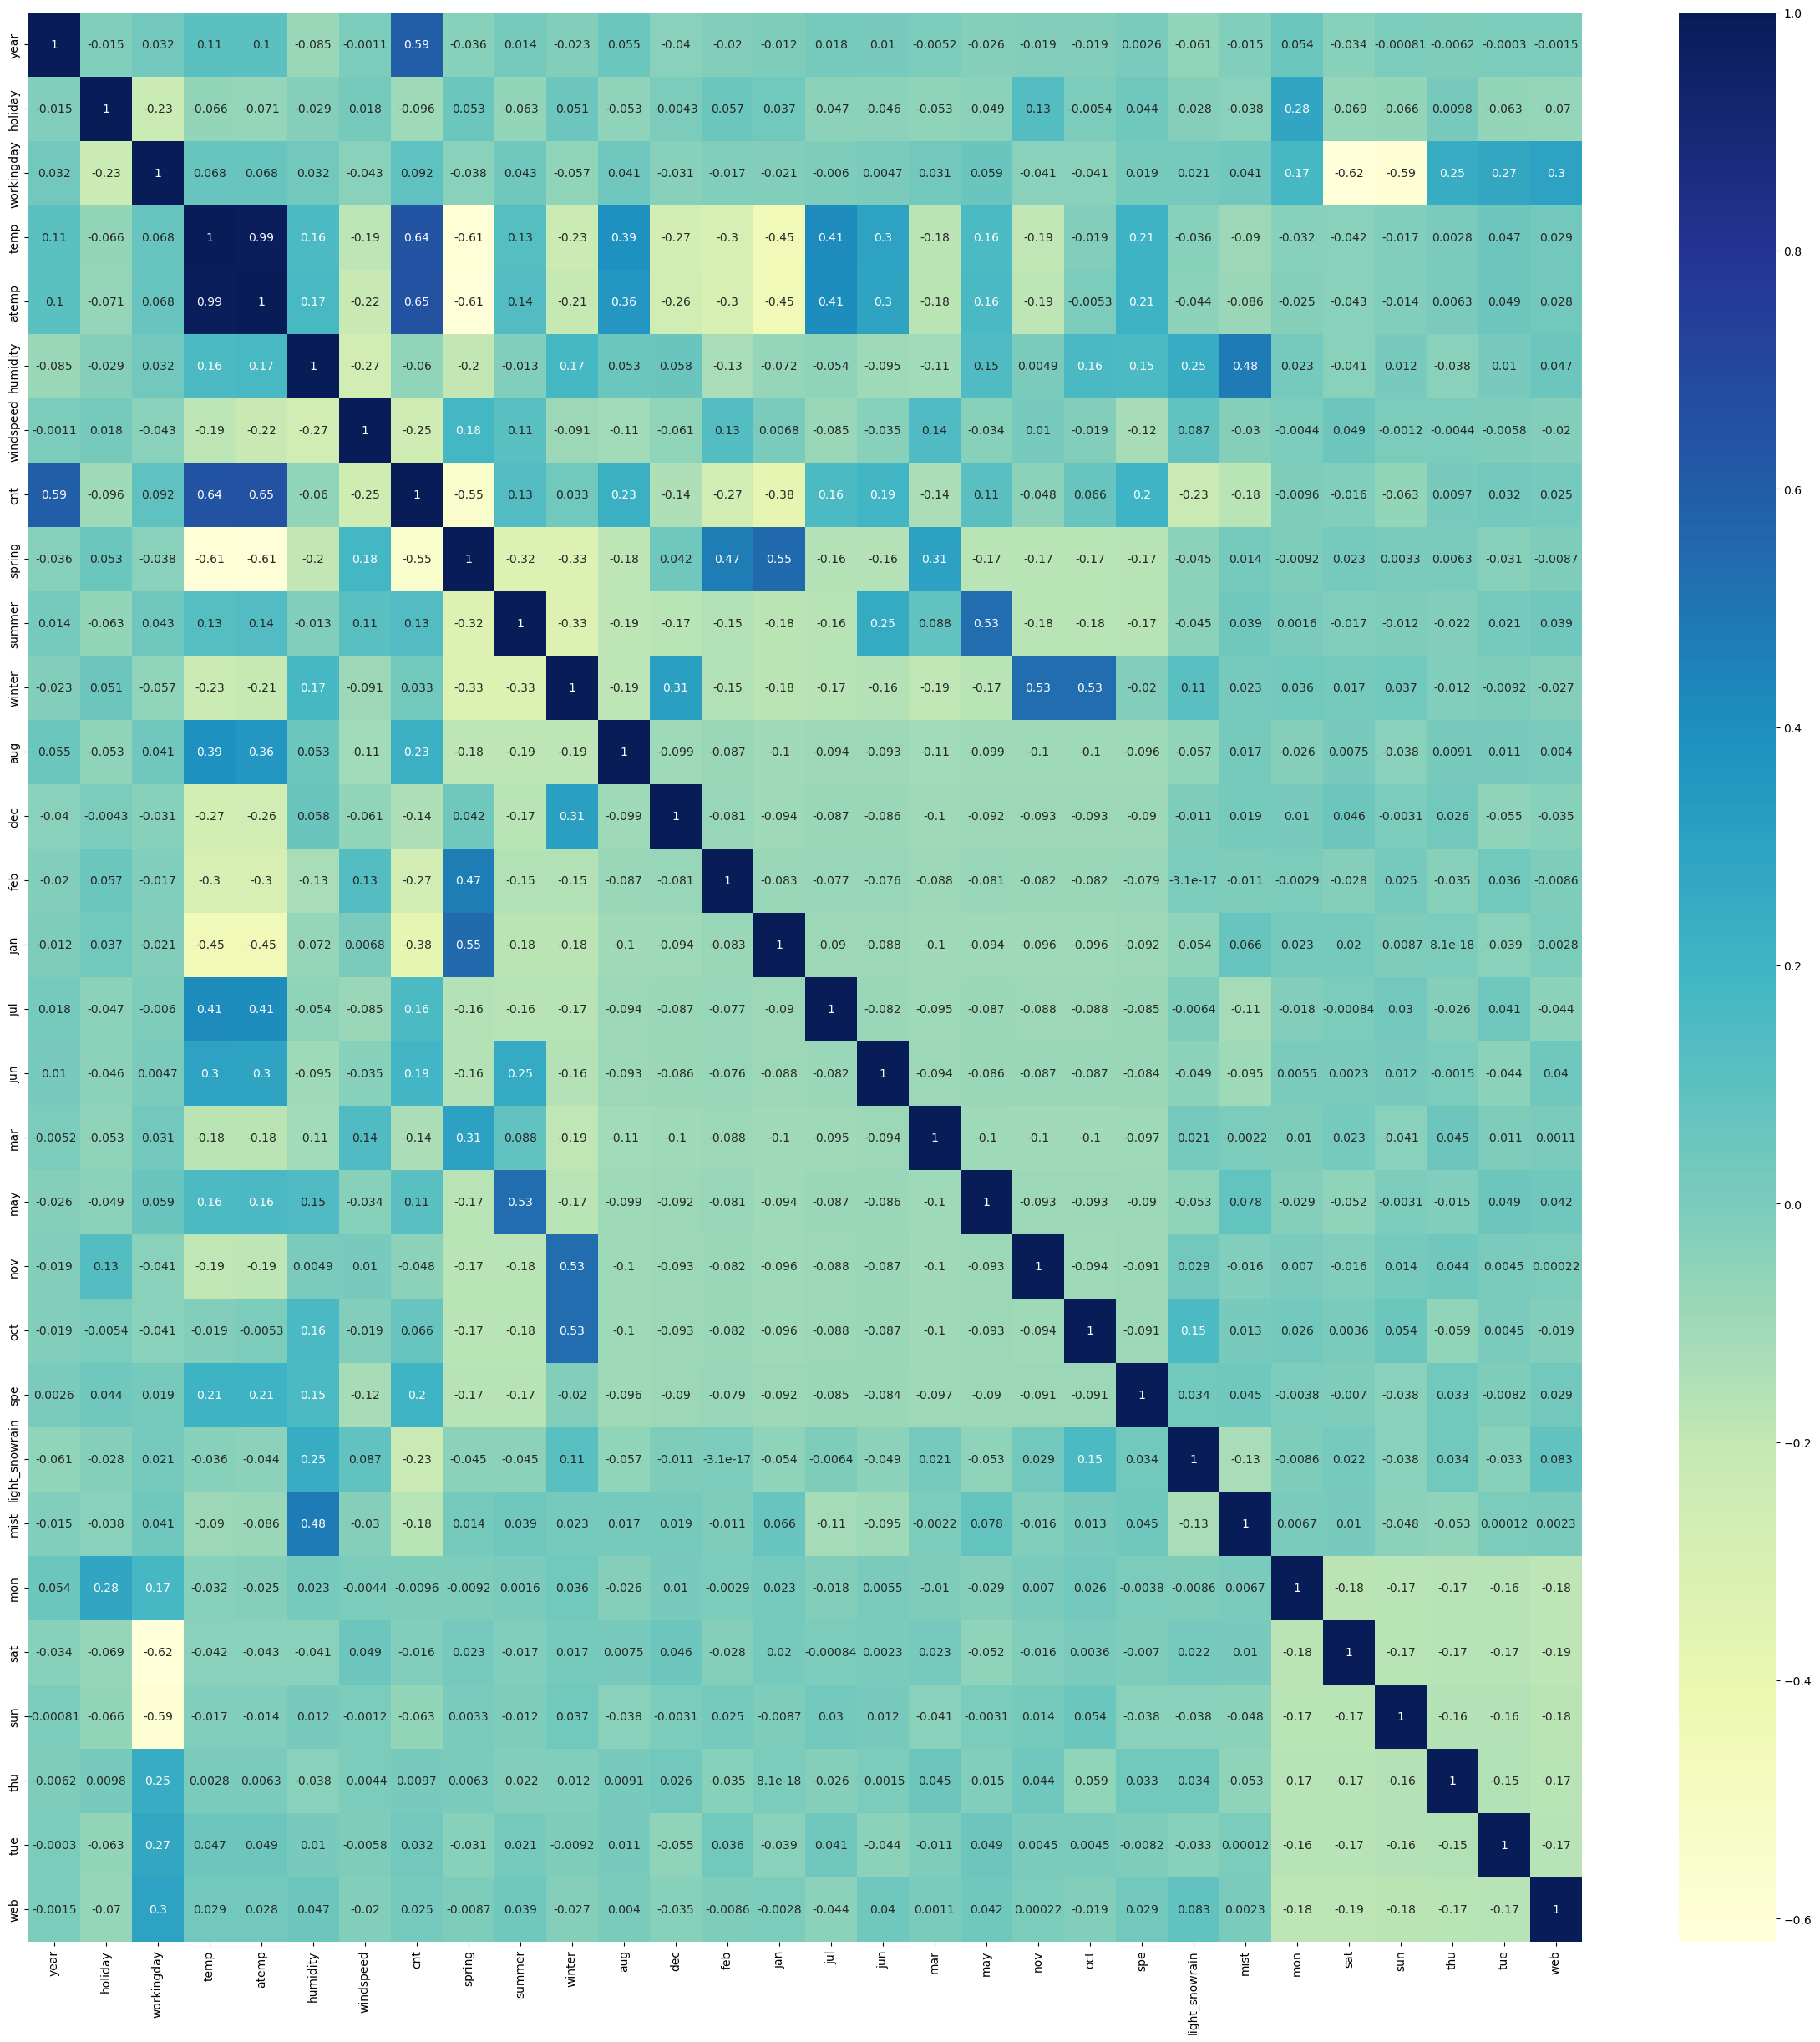

In [1421]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1423]:
Y_train = data_train.pop('cnt')
X_train = data_train

In [1425]:
### Building our model using REF - Recursive feature elimination

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1429]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [1431]:
# Apply RFE with 10 features to select
rfe = RFE(estimator=lm, n_features_to_select=15)
# Fit the RFE model
rfe.fit(X_train, Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1433]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', False, 2),
 ('oct', False, 13),
 ('spe', True, 1),
 ('light_snowrain', True, 1),
 ('mist', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('web', False, 12)]

In [1435]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'winter', 'jan', 'jul', 'spe', 'light_snowrain', 'mist',
       'sat', 'sun'],
      dtype='object')

In [1437]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov',
       'oct', 'mon', 'thu', 'tue', 'web'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1439]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1441]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1443]:
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [1445]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.03e-190
Time:                        12:10:38   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2503      0.025      9.

In [1447]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1449]:
vif = calculate_vif(X_train_rfe)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
14,sat,inf
15,sun,inf
4,temp,3.19
7,spring,2.72
5,humidity,1.90
8,winter,1.81
13,mist,1.57
9,jan,1.55


In [1451]:
# Dropping the holiday feature since it has high p-value and high VIF
X_train_new = X_train_rfe.drop(['holiday'], axis=1)

In [1453]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [1455]:
lm = sm.OLS(Y_train,X_train_new).fit()   # Running the linear model

In [1457]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.03e-190
Time:                        12:11:08   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2443      0.040      6.

In [1459]:
vif = calculate_vif(X_train_new)
vif

,Features,VIF
0,const,101.18
2,workingday,9.07
13,sat,6.06
14,sun,5.74
3,temp,3.19
6,spring,2.72
4,humidity,1.90
7,winter,1.81
12,mist,1.57
8,jan,1.55


In [1461]:
# Dropping the workingday feature since it has high VIF
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [1463]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_new).fit()   # Running the linear model

In [1465]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          7.45e-188
Time:                        12:11:25   Log-Likelihood:                 506.00
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     496   BIC:                            -924.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3446      0.032     10.

In [1467]:
vif = calculate_vif(X_train_new)
vif

,Features,VIF
0,const,61.47
2,temp,3.19
5,spring,2.71
3,humidity,1.90
6,winter,1.81
11,mist,1.57
7,jan,1.55
8,jul,1.31
10,light_snowrain,1.25
4,windspeed,1.19


In [1469]:
# Dropping the workingday feature since it has high VIF
X_train_new = X_train_new.drop(['sat'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.05e-188
Time:                        12:11:36   Log-Likelihood:                 505.22
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     497   BIC:                            -929.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3481      0.031     11.

In [1471]:
vif = calculate_vif(X_train_new)
vif

,Features,VIF
0,const,60.98
2,temp,3.18
5,spring,2.71
3,humidity,1.89
6,winter,1.81
11,mist,1.56
7,jan,1.55
8,jul,1.31
10,light_snowrain,1.25
4,windspeed,1.19


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

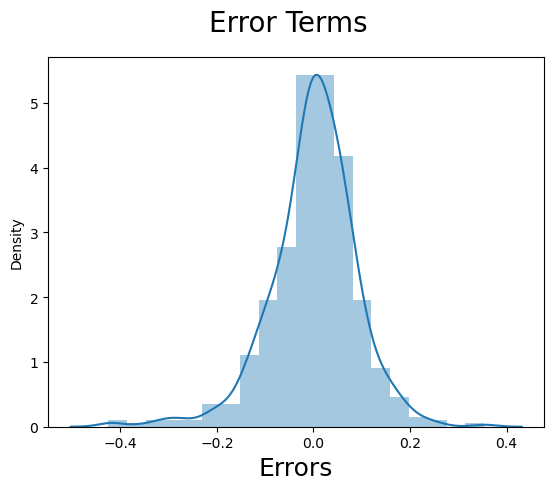

In [1475]:
Y_train_price = lm.predict(X_train_new)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions
Apply Scaling to Test Set

In [1478]:
# ReScaling the Features

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [1480]:
# Dividing into X_test and y_test
y_test = data_test.pop('cnt')
X_test = data_test

In [1484]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop(['const'], axis=1)

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1486]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

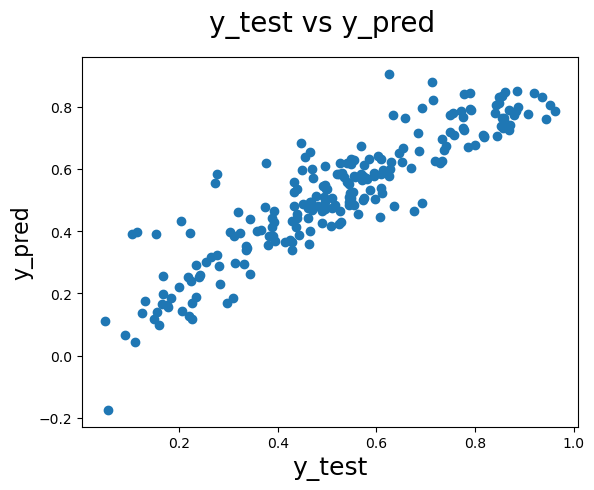

In [1488]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Calculate R2 Score

In [1490]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8152580032317157

#### Equation of Best Fitted line can be determined as
cnt = 0.2317*year + 0.4614*temp - 0.1446*humidity - 0.1771*windspeed - 0.1006*spring + 0.0510*winter - 0.0408*jan -0.0733*jul + 0.0566*sep - 0.2483*light_snowrain -0.0569*mist - 0.0417*sun